#AutoEncoder and Kmeans

This code is the implementation of the below paper:

***DAC: Deep Autoencoder-based Clustering, a General Deep Learning Framework of Representation Learning***




DAC: Deep Autoencoder-based Clustering, a General Deep Learning Framework of Representation Learning. In this code, a Deep Autoencoder network is utilized for dimensionality reduction of data and better representation for clustering with the k-means algorithm.

Clustering is an unsupervised learning technique aimed at grouping similar data solely based on their features without any initial labels. Each cluster consists of data points that have more similarity among themselves compared to data points in other clusters.

The k-means algorithm is a popular clustering algorithm that attempts to divide a set of points into K clusters. It works by randomly selecting centroids for each cluster and assigning each data point to the nearest centroid.

**Steps:**

1. Firstly, using necessary libraries such as PyTorch and TensorFlow, we create a Deep Autoencoder network based on the model presented in the paper. Also,we use various activation functions such as Sigmoid, Tanh, and ReLU should be used for implementation.

2. we only use the MNIST dataset for training the model and train the autoencoder based on the loss function provided in the paper.

3. After training the autoencoder, we use the hidden layer obtained from the autoencoder as input for the Means-K algorithm for clustering and evaluate the final output.

4. we evaluate the obtained results using evaluation metrics from the paper such as ARI (Adjusted Rand Index) and report the results similar to the tables in the paper.

##importing libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
%matplotlib inline
import time
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

##AutoEncoder Class (Network)

In [ ]:
class AutoEncoder(torch.nn.Module):
  def __init__(self, num_input):
    super().__init__()
    self.encoder = torch.nn.Sequential(
      torch.nn.Linear(num_input, 512),
      torch.nn.ReLU(),
      torch.nn.Tanh(),
      torch.nn.Linear(512, 128),
      torch.nn.ReLU(),
      torch.nn.Tanh(),
      torch.nn.Linear(128, 32),
      torch.nn.Tanh(),
      torch.nn.Linear(32, 10)
    )

    self.decoder = torch.nn.Sequential(
      torch.nn.Linear(10, 32),
      torch.nn.Tanh(),
      torch.nn.Linear(32, 128),
      torch.nn.Tanh(),
      torch.nn.Linear(128, 512),
      torch.nn.Tanh(),
      torch.nn.Linear(512, num_input),
      torch.nn.Sigmoid()
    )


  def forward(self,input_features):
    out_ = self.encoder(input_features)
    out = self.decoder(out_)
    return out_, out

##MNIST train test datasets and dataloaders

In [ ]:
RANDOM_SEED = 1
BATCH_SIZE = 100
NUM_EPOCHS = 50
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


##########################
### MNIST DATASET
##########################

# Note transforms.ToTensor() scales input images
# to 0-1 range
train_dataset = datasets.MNIST(root='data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='data',
                              train=False,
                              transform=transforms.ToTensor())


train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False)

# Checking the dataset
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([100, 1, 28, 28])
Image label dimensions: torch.Size([100])


In [ ]:
torch.manual_seed(RANDOM_SEED)
model = AutoEncoder(num_input=28*28)

model = model.to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

##Weights Calculations (for using in loss function, pay more attention to pixels that are in the middle of the picture)

In [ ]:
num_samples = 100
num_features = 784
weights = []
samples = []
labels = []

counter1 = 0
sum1 = 0
counter2 = 0
sum2 = 0

for i in range(num_samples):
  samples.append(train_dataset[i][0][0].reshape(784))
  labels.append(train_dataset[i][1])

for i in range(num_features):
  counter1 = 0
  sum1 = 0
  counter2 = 0
  sum2 = 0

  for j in range(1,num_samples):
    sample = samples[j]
    ith_feature = sample[i]
    ith_label = labels[0]
    for k in range(1,num_samples):
      jth_feature = samples[k][i]
      jth_label = labels[k]

      if jth_label == ith_label:
        sum1 += 1
        counter1 += np.exp(-(ith_feature - jth_feature) ** 2)
      else:
        sum2 += 1
        counter2 += (1 - np.exp(-(ith_feature - jth_feature) ** 2))

  t1 = counter1/sum1
  t2 = counter2/sum2

  weights.append(t1 * t2)

In [ ]:
weights_ = []
for w in weights:
  weights_.append(w.item())

weights_ = torch.tensor(weights_).to(DEVICE)
len(weights_), weights_

(784,
 tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.8460e-06, 9.5770e-03,
         3.7525e-02, 2

##training the network

In [ ]:
def compute_loss(net, data_loader):
    curr_loss = 0.
    with torch.no_grad():
        for cnt, (features, targets) in enumerate(data_loader):
            features = features.view(-1, 28*28).to(DEVICE)
            targets = targets.to(DEVICE)
            encoder, logits = net(features)
            loss = F.mse_loss(logits, features)
            curr_loss += loss
        return float(curr_loss)/cnt


def weighted_mse_loss(input, target, weight):
    return torch.sum(weight * ((input - target) ** 2)) / 784

start_time = time.time()
minibatch_cost = []
epoch_cost = []
for epoch in range(NUM_EPOCHS):
    model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):

        features = features.view(-1, 28*28).to(DEVICE)
        targets = targets.to(DEVICE)

        ### FORWARD AND BACK PROP
        encoder, logits = model(features)
        # print(logits.shape,targets.shape)
        # index__ = ((batch_idx + 1) * 100)
        cost = weighted_mse_loss(logits, features, weights_)
        optimizer.zero_grad()

        cost.backward()

        ### UPDATE MODEL PARAMETERS
        optimizer.step()

        ### LOGGING
        minibatch_cost.append(cost.item())
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f'
                   %(epoch+1, NUM_EPOCHS, batch_idx,
                     len(train_loader), cost.item()))

    cost = compute_loss(model, train_loader)
    epoch_cost.append(cost)
    print('Epoch: %03d/%03d Train Cost: %.4f' % (
            epoch+1, NUM_EPOCHS, cost))
    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))

print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001/050 | Batch 000/600 | Cost: 1.4617
Epoch: 001/050 | Batch 050/600 | Cost: 1.0096
Epoch: 001/050 | Batch 100/600 | Cost: 0.9606
Epoch: 001/050 | Batch 150/600 | Cost: 0.8548
Epoch: 001/050 | Batch 200/600 | Cost: 0.8197
Epoch: 001/050 | Batch 250/600 | Cost: 0.7932
Epoch: 001/050 | Batch 300/600 | Cost: 0.7897
Epoch: 001/050 | Batch 350/600 | Cost: 0.6994
Epoch: 001/050 | Batch 400/600 | Cost: 0.7004
Epoch: 001/050 | Batch 450/600 | Cost: 0.6424
Epoch: 001/050 | Batch 500/600 | Cost: 0.6249
Epoch: 001/050 | Batch 550/600 | Cost: 0.5722
Epoch: 001/050 Train Cost: 0.1283
Time elapsed: 0.25 min
Epoch: 002/050 | Batch 000/600 | Cost: 0.5228
Epoch: 002/050 | Batch 050/600 | Cost: 0.5619
Epoch: 002/050 | Batch 100/600 | Cost: 0.5358
Epoch: 002/050 | Batch 150/600 | Cost: 0.4980
Epoch: 002/050 | Batch 200/600 | Cost: 0.4949
Epoch: 002/050 | Batch 250/600 | Cost: 0.4737
Epoch: 002/050 | Batch 300/600 | Cost: 0.4939
Epoch: 002/050 | Batch 350/600 | Cost: 0.4442
Epoch: 002/050 | Batch 

## creating embedding matrix for training dataset

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 60000 * 10
model.eval()
embeddings = []
labels = []
with torch.no_grad():
    for i, (features, targets) in enumerate(train_loader):

        features = features.view(-1, 28*28).to(DEVICE)
        targets = targets.to(DEVICE)

        embedding = model.encoder(features)

        for _, emb in enumerate(embedding):
          embeddings.append(emb.cpu().numpy())

        for _, l in enumerate(targets):
          labels.append(l.cpu().numpy())

print(len(embeddings), len(embeddings[0]))

60000 10


## creating embedding matrix for test dataset (both before and after embedding)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 60000 * 10
model.eval()
embeddings_test = []
embeddings_test_no_encoder = []
labels_test = []
with torch.no_grad():
    for i, (features, targets) in enumerate(test_loader):

        features = features.view(-1, 28*28).to(DEVICE)
        targets = targets.to(DEVICE)

        embedding = model.encoder(features)

        for _, emb in enumerate(embedding):
          embeddings_test.append(emb.cpu().numpy())

        for _, emb in enumerate(features):
          embeddings_test_no_encoder.append(emb.cpu().numpy())

        for _, l in enumerate(targets):
          labels_test.append(l.cpu().numpy())

print(len(embeddings_test), len(embeddings_test[0]))
print(len(embeddings_test_no_encoder), len(embeddings_test_no_encoder[0]))

10000 10
10000 784


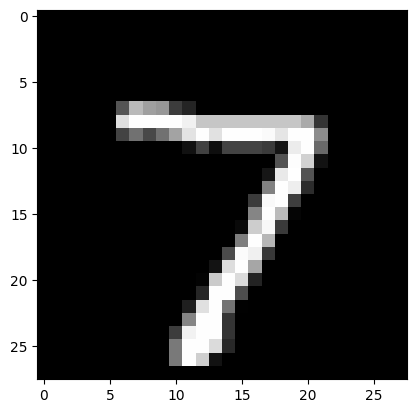

In [ ]:
images, labels = next(iter(test_loader))
plt.imshow(images[0].reshape(28,28), cmap="gray")

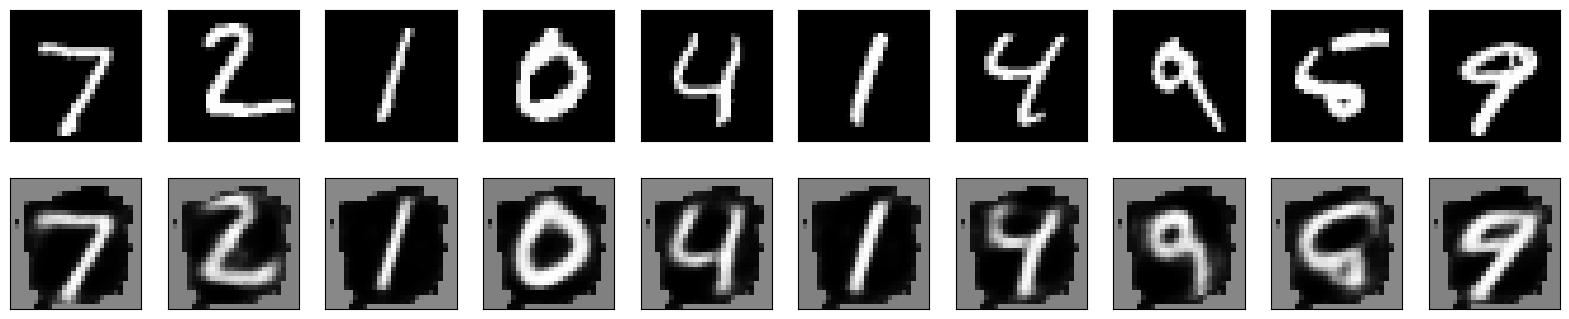

In [ ]:
#Display actual test images and images made with model

with torch.no_grad():
  n = 10
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # Original data
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(images[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      # Display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      x = torch.tensor(np.float32(embeddings_test[i])).to(DEVICE)
      x_ = model.decoder(x).reshape(28, 28).cpu()
      plt.imshow(x_)
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

##Feeding embeddings to KMeans

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(embeddings_test)

# labels_pred = kmeans.predict(embeddings)

# adjusted_rand_score(labels,labels_pred)

In [ ]:
labels_pred = kmeans.predict(embeddings_test)

adjusted_rand_score(labels_test,labels_pred)

0.563651524843201

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(embeddings_test_no_encoder)

# labels_pred = kmeans.predict(embeddings)

# adjusted_rand_score(labels,labels_pred)

In [ ]:
labels_pred = kmeans.predict(embeddings_test_no_encoder)

adjusted_rand_score(labels_test,labels_pred)

0.34193110116246045